# Basic Operations on Images

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#basic-ops

## Import modules

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Let’s load a color image first:

In [2]:
img = cv2.imread('img/messi5.jpg')

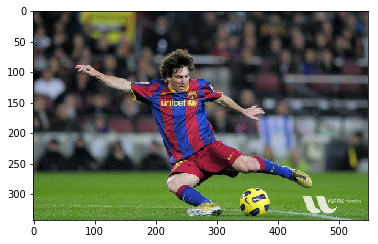

In [3]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

## Accessing Image Properties

In [4]:
img

array([[[ 39,  43,  44],
        [ 42,  46,  47],
        [ 44,  47,  52],
        ...,
        [ 57,  55,  55],
        [ 55,  53,  53],
        [ 52,  50,  50]],

       [[ 37,  40,  44],
        [ 42,  45,  49],
        [ 46,  49,  54],
        ...,
        [ 62,  60,  60],
        [ 60,  58,  58],
        [ 57,  55,  55]],

       [[ 41,  45,  50],
        [ 46,  50,  55],
        [ 51,  55,  60],
        ...,
        [ 64,  63,  65],
        [ 63,  62,  64],
        [ 60,  59,  61]],

       ...,

       [[ 56, 143,  99],
        [ 48, 133,  89],
        [ 49, 129,  86],
        ...,
        [ 60, 134,  92],
        [ 63, 134,  94],
        [ 73, 145, 103]],

       [[ 54, 138,  96],
        [ 59, 141,  99],
        [ 50, 130,  87],
        ...,
        [ 56, 132,  91],
        [ 69, 142, 104],
        [ 64, 137,  97]],

       [[ 45, 129,  87],
        [ 58, 140,  98],
        [ 71, 151, 108],
        ...,
        [ 49, 124,  86],
        [ 52, 125,  87],
        [ 51, 124,  86]]

Shape of image is accessed by `img.shape`. It returns a tuple of number of rows, columns and channels (if image is color):

In [5]:
img.shape

(342, 548, 3)

Total number of pixels is accessed by `img.size`:

In [6]:
img.size

562248

Image datatype is obtained by `img.dtype`:

In [7]:
img.dtype

dtype('uint8')

## Accessing and Modifying pixel values

You can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [8]:
img[100, 100]

array([157, 166, 200], dtype=uint8)

In [9]:
# accessing only blue pixel
blue = img[100,100,0]
print(blue)

157


You can modify the pixel values the same way

In [10]:
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


### Warning

Numpy is a optimized library for fast array calculations. So simply accessing each and every pixel values and modifying it will be very slow and it is discouraged.

### Note

Above mentioned method is normally used for selecting a region of array, say first 5 rows and last 3 columns like that. For individual pixel access, Numpy array methods, `array.item()` and `array.itemset()` is considered to be better. But it always returns a scalar. So if you want to access all B,G,R values, you need to call `array.item()` separately for all.

In [11]:
# accessing RED value
img.item(10,10,2)

59

In [12]:
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

## Image ROI

Sometimes, you will have to play with certain region of images. For eye detection in images, first perform face detection over the image until the face is found, then search within the face region for eyes. This approach improves accuracy (because eyes are always on faces :D ) and performance (because we search for a small area).

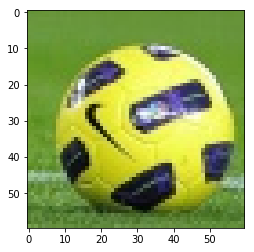

In [13]:
ball = img[280:340, 330:390]
ball2 = cv2.cvtColor(ball, cv2.COLOR_BGR2RGB)
plt.imshow(ball2)

ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the image:

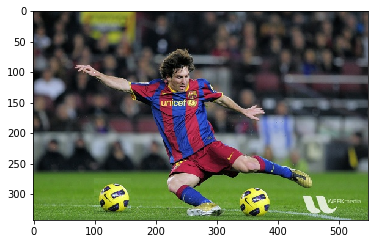

In [14]:
img[273:333, 100:160] = ball
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

## Splitting and Merging Image Channels
The B,G,R channels of an image can be split into their individual planes when needed. Then, the individual channels can be merged back together to form a BGR image again. This can be performed by:

In [15]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

or

In [16]:
b = img[:,:,0]

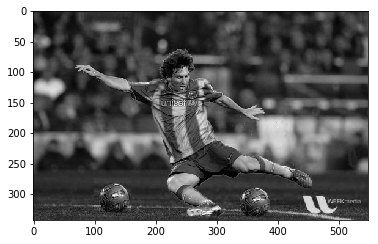

In [17]:
plt.imshow(b, cmap = 'gray')

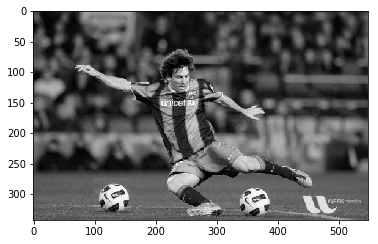

In [18]:
plt.imshow(r, cmap = 'gray')

Suppose, you want to make all the red pixels to zero, you need not split like this and put it equal to zero. You can simply use Numpy indexing which is faster.

In [19]:
img[:,:,2] = 0

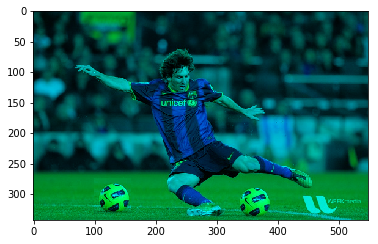

In [20]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

### Warning
`cv2.split()` is a costly operation (in terms of time), so only use it if necessary. Numpy indexing is much more efficient and should be used if possible.